# Modeling of a quantitative epigenetic memory in Arabidopsis Thaliana
<br>
### Achille Fraisse, Rana Houry, Kyrylo Krasnykov, Cécile Ligneau

## Introduction
<br>
Data from "A Polycomb-based switch underlying quantitative epigenetic memory"
<br>
In this article, the authors work on the flowering of Arabidopsis, depending on the temperature. In fact, the cold has an effect on the epigenetic of the FLC gene which regulates the floral initiation. In summer the nucleosomes of the gene are slowly activated (for example by acetylation) whereas with the cold they are inactivated (by methylation).The parts of the nucleosomes that can be methylated are the histones H3 (two per nucleosome). This mechanism allows a "winter memory": the gene FLC is more and more inhibited by methylation with the cold. When spring comes back it is still methylated, promoting the flowering. Then with the high temperature it is slowly activated, and so the flowering doesn't begin directly at the begining of spring. Also nucleosomes are affected by the states of their neighbors, which means that when a nucleosome is activated it increases the chance of its neighbors to be activated as well and so it is when a nucleosome is methulated.
<br>
The authors modeled these epigenetic modifications with mathematical functions and in this project we used their data to model the modifications in Python. However, we changed some elements to make them functional in our system and to match our model. Also the values of some variables were chosen arbitrarily.  
<br>
In this system, when the cold arrives, the histones change between 3 states. They start by being activated and then they change to an undefined state followed by a methylated state. Moreover, in winter the histones can be nucleated which increases their probability to be in a methylated state. On the contrary, when the weather is warm they have a chance to be enucleated and to go to an activated state. 

# General Scheme of the Used Model
![](Image1.png)
### Angel, A., Song, J., Dean, C., and Howard, M. (2011). A Polycomb-based switch underlying quantitative epigenetic memory. Nature 476, 105–108.

## Mathematical model
### Defining the parameters of our model
<br>
x = base probability to switch from A to U
 <br>
 y = base probability to switch from U to A
 <br>
 z = base probability to switch from U to M
 <br>
 a = base probability to switch from M to U
 <br>
 g = additional probability to the U->A and U->M transitions
 <br>
 coopa = the probability we add to the transition M->U  and U->A when neigbourh is acetylated
 <br>
 coopm = the probability we add to the transition A->U  and U->M when neigbourh is acetylated 
 <br>
 eps = additional probability for A->M and U->M when there is nucleation
 <br>
 Pdn = probability in summer for the histone to be nucleated, this parameter has a fixed value given in the article
 <br>
 C = the maximum probability per sweep with which a locus can become competent to nucleate
 <br>
 K = effective "dissociation constant" for the time Ͳ dependent probability for a locus to become competent to nucleate

For "g", "eps", "Pdn", "C" and "K", the values come from the article.
<br>
For the other variables we choose the values 4 x g arbitrarily. 
<br>
### Matrices principle

To represent our model in different conditions, we created four matrices built on the following matrix:

$$\begin{pmatrix} A\rightarrow A & A\rightarrow U & A\rightarrow M \\ U\rightarrow A & U\rightarrow U & U\rightarrow M \\ M\rightarrow A & M\rightarrow U & M\rightarrow M \end{pmatrix}$$

### Matrices
 
M0 is the matrix for histones with no nucleation and non-depending on the other histones state.
In this matrix g illustrates the fact that when the histone is in an undefined state, it changes toward another state, methylation or activation, with the same probability.

$$\mathbf{M_0}$$
$$\hspace{10pt} \begin{matrix} \hspace{30pt} \color{Red}{\mathcal{A}}\hspace{30pt} & \color{Grey}{\mathcal{U}} \hspace{35pt} & \color{royalblue}{\mathcal{M}}\hspace{30pt} \end{matrix} \\
\begin{matrix} \color{Red}{\mathcal{A}} \\ \color{grey}{\mathcal{U}} \\\color{royalblue}{\mathcal{M}} \end {matrix} \begin{pmatrix} 1-x & x & 0 \\ y+0.5*g & 1-y-z-g & z+0.5*g \\ 0 & a & 1-a \end{pmatrix}$$

MT is the matrix for histones when we take into account their nucleation (which increases probability of methylation)

$$\mathbf{M_T}$$
$$\hspace{10pt} \begin{matrix} \hspace{12pt} \color{Red}{\mathcal{A}}\hspace{10pt} & \color{Grey}{\mathcal{U}} \hspace{10pt} & \color{royalblue}{\mathcal{M}}\hspace{5pt} \end{matrix} \\
\begin{matrix} \color{Red}{\mathcal{A}} \\ \color{grey}{\mathcal{U}} \\\color{royalblue}{\mathcal{M}} \end {matrix} 
\begin{pmatrix} -eps & 0 & eps \\ 0 & -eps & eps \\ 0 & 0 & 0 \end{pmatrix}$$

Mcoopa is the matrix of histones when one or two of their neighboors are $\color{red}{\mathsf{activated}}$, which increases its chances to be $\color{red}{\mathsf{activated}}$ itself

$$\mathbf{M_{coopa}}$$
$$\hspace{10pt} \begin{matrix} \hspace{5pt} \color{Red}{\mathcal{A}}\hspace{3pt} & \color{Grey}{\mathcal{U}} \hspace{2pt} & \color{royalblue}{\mathcal{M}}\hspace{1pt} \end{matrix} \\
\begin{matrix} \color{Red}{\mathcal{A}} \\ \color{grey}{\mathcal{U}} \\\color{royalblue}{\mathcal{M}} \end {matrix}
\begin{pmatrix} 0 & 0 & 0 \\ 1 & -1 & 0 \\ 0 & 1 & -1 \end{pmatrix}$$

Mcoopm is the matrix of histones when one or two of their neighbors are $\color{royalblue}{\mathsf{methylated}}$, which increases its chances to be $\color{royalblue}{\mathsf{methylated}}$ itself

$$\mathbf{M_{coopm}}$$
$$\hspace{10pt} \begin{matrix} \hspace{8pt} \color{Red}{\mathcal{A}}\hspace{3pt} & \color{Grey}{\mathcal{U}} \hspace{-1pt} & \color{royalblue}{\mathcal{M}}\hspace{0pt} \end{matrix} \\
\begin{matrix} \color{Red}{\mathcal{A}} \\ \color{grey}{\mathcal{U}} \\\color{royalblue}{\mathcal{M}} \end {matrix}
\begin{pmatrix} -1 & 1 & 0 \\ 0 & -1 & 1 \\ 0 & 0 & 0 \end{pmatrix}$$

$$M=M_0 + \theta\ M_T +(coopaM_{coopa}) +(coopmM_{coopm})$$

## Let's try out our program!

Start by importing the needed libraries 

In [1]:
import importlib
import numpy as np

import nucleosome_simulation
importlib.reload(nucleosome_simulation)
from nucleosome_simulation import*

import matplotlib.pyplot as plt

import plot
importlib.reload(plot)
from plot import plot_nuc, histo_nuc, draw

import saving 
importlib.reload(saving)
from saving import save_nuc, load_nuc, unlist


%matplotlib notebook
plt.ion()

If you want to check what every imported function does, please check the files "nucleosome simulation.py", "plot.py" and "saving.py"

To generate new data and save it: launch box 1 (the simulation can take a little time).

But we made it easier for you so you can just use the simulation that we made and sent you with this notebook. To do so launch box 2.

In [2]:
"""box 1"""
#nucleosome, geneactivation = simulation(120,120)
#save_nuc(nucleosome,"nucleosomes_120120.txt")
#np.savetxt("genevalues_120120",geneactivation)

'box 1'

In [3]:
"""box 2"""
nucleosome=load_nuc("nucleosomes_120120.txt")
geneactivation= genfromtxt("genevalues_120120.txt")

"nuc" represents the state of the nucleosomes over time and "act_hour" represents the gene activation per hour in every histone

Now let's represent the state of the nucleosomes over time:
<br>
The function below, draw(), allows you to draw histograms showing the proportions of every state of the nucleosome over time (one histogram every 10 days).
Note that in the abscissas axis the states are represented by [a,b], where a is a number that refers to the state of the nucleosome (0: unmodified, 1: activated and 2: methylated) and b is a number representing whether the histone is nucleated or not.
<br>
This function doesn't just allow you to visualize the histograms over time but it also saves those images on your computer and names them histo_gif(i) where i is the number of the photo. 

<IPython.core.display.Javascript object>


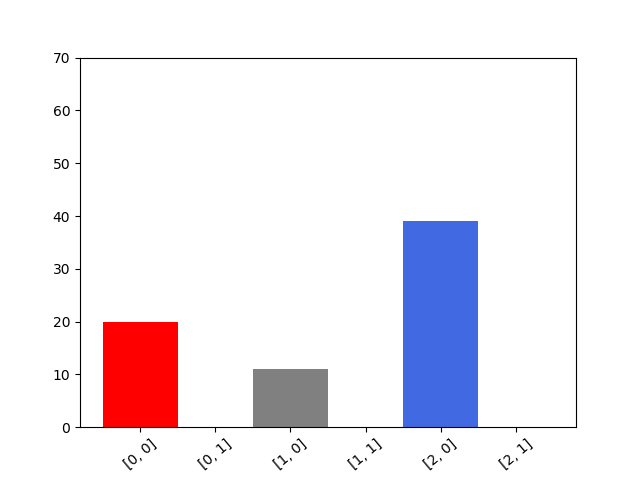

In [4]:
%matplotlib notebook
plt.ion()
draw(nucleosome)

Kyrylo time

<IPython.core.display.Javascript object>


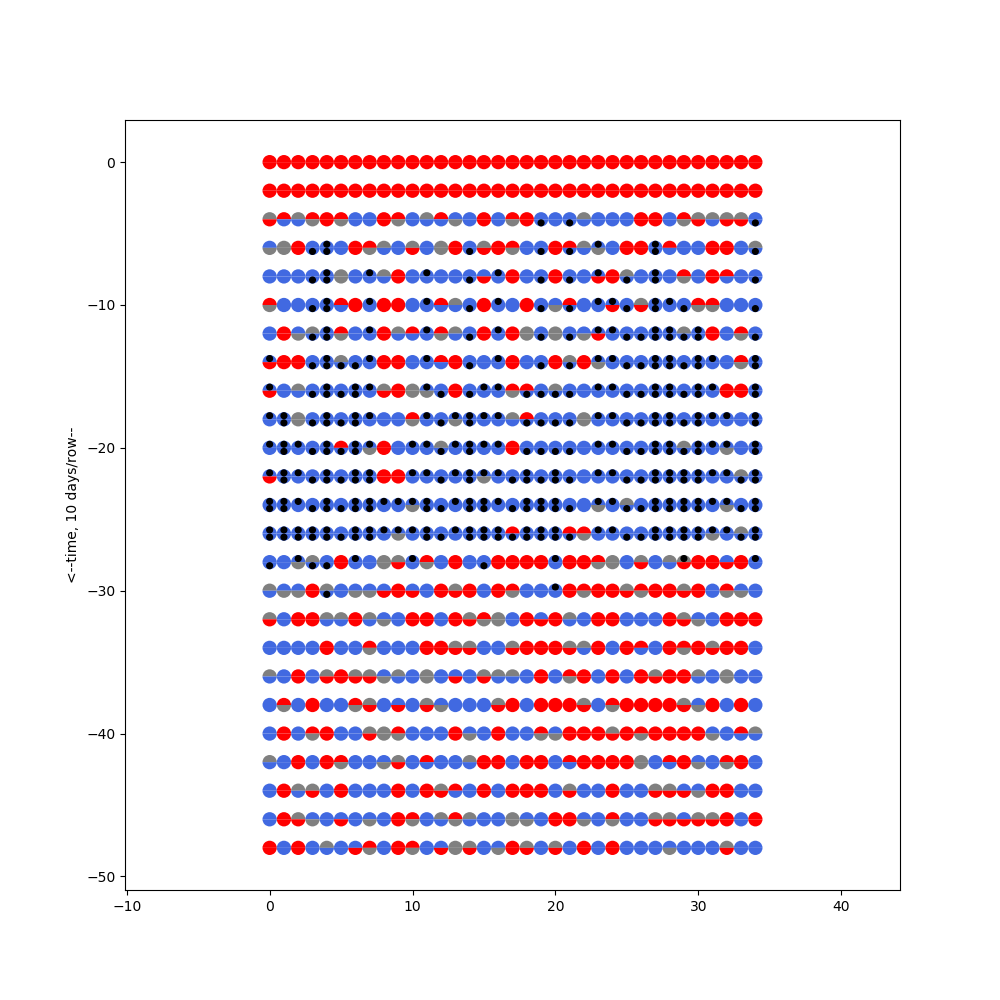

Text(0,0.5,'<--time, 10 days/row--')

In [9]:
plt.rcParams['figure.figsize']=10,10

figure =plt.figure(0)
for i in range(len(nucleosome)):
    plot_nuc(nucleosome[i],-2*i,figure)
plt.ylabel("<--time, 10 days/row--")

Forest green

<IPython.core.display.Javascript object>


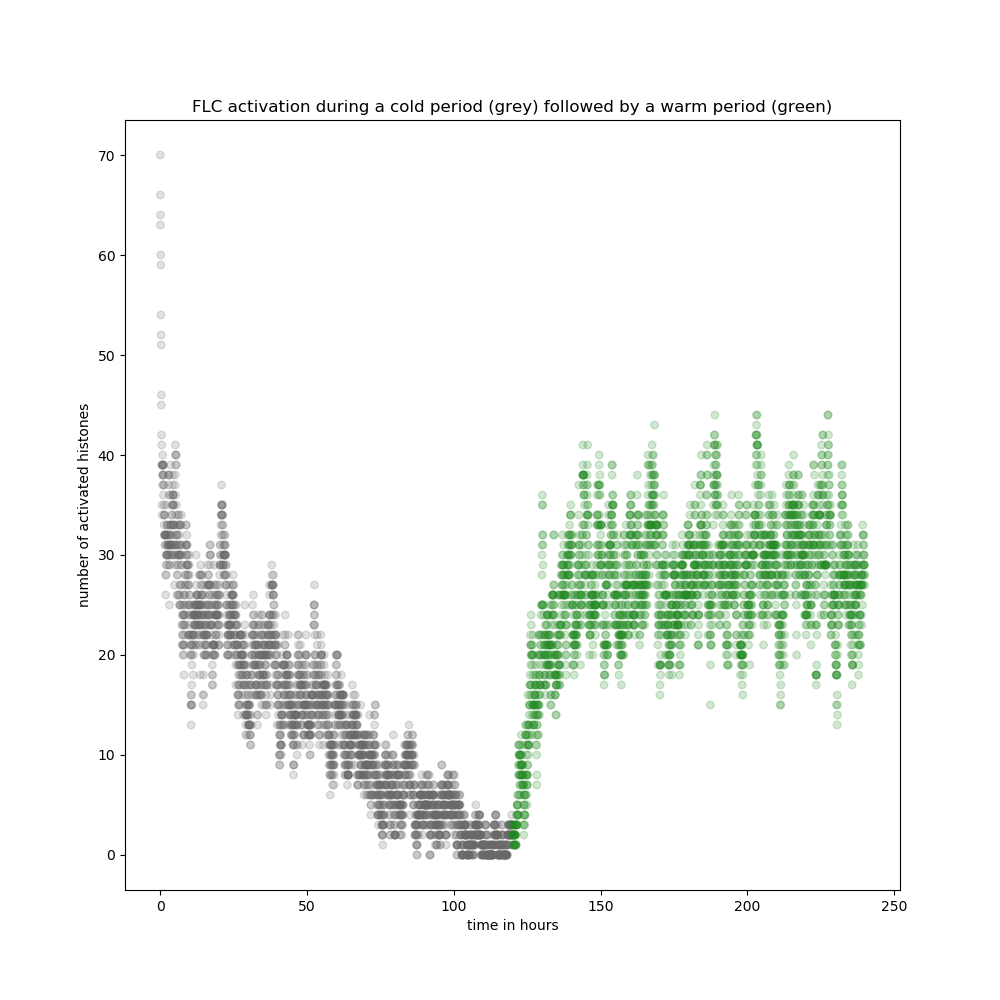

Text(0.5,0,'time in hours')

In [12]:
figure= plt.figure(2)
figure.clf()
col=["dimgrey" for i in range(int(len(geneactivation)/2))]+["forestgreen"for i in range(int(len(geneactivation)/2))]
figure.gca().scatter(np.array([i/24 for i in range(len(geneactivation))]),geneactivation,alpha=0.2, color=col, s=30)

plt.title("FLC activation during a cold period (grey) followed by a warm period (green)")
plt.ylabel("number of activated histones")
plt.xlabel("time in hours")

## Conclusion
### What is good with our model
Includes a lot of parameters
<br>
Near to the article model
<br>
Many ways of schematic representation
### What we could have improved
Model the impact on cells
<br>
Study more the influence of the parameters
<br>
Could be improved by making it closer to real-time processes (unfortunately, it would be much more complex)


## Authors contribution
This work was done by equal collaboration of all participants on different level.
However it's normal that each one of us has contributed to some parts more than to the others.



## Acknowledgments: 
Special thanks to Ronan and Guillaume for their strong support and advice in programming, modelling but also in deep grammar optimisation research and advanced color choices for figures.